In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_URL + "telecom_churn.csv")

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
features = ['Total day minutes', 'Total intl calls']

array([[<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>]], dtype=object)

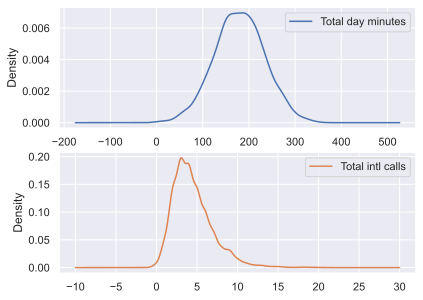

In [8]:
df[features].plot(
    kind='density',
    subplots=True,
    layout=(2, 1),
    sharex=False,
)

<Axes: xlabel='Total intl calls'>

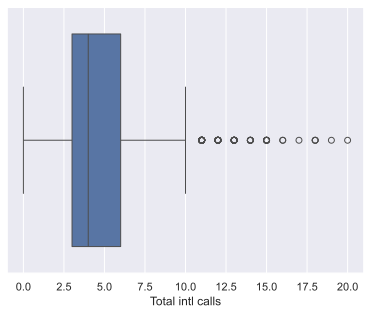

In [11]:
sns.boxplot(x='Total intl calls', data=df)

<Axes: xlabel='Customer service calls', ylabel='count'>

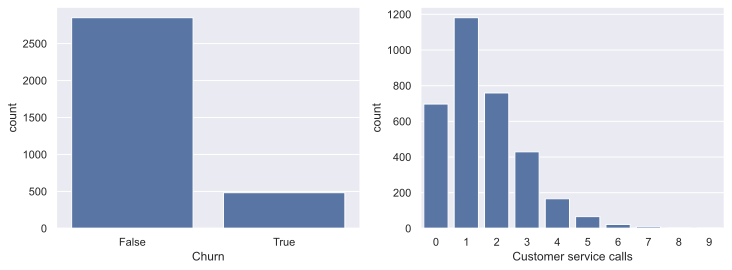

In [17]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])


In [20]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


<Axes: >

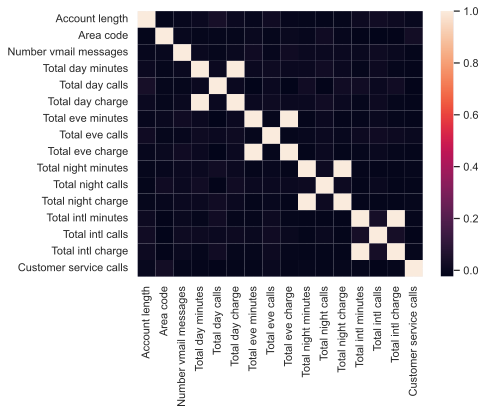

In [22]:
corr = df[numeric_features].corr()
sns.heatmap(corr)

In [26]:
numeric_features = set(numeric_features) - set(
    [
       "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
    ]
)

print(numeric_features)

{'Total eve minutes', 'Total night calls', 'Area code', 'Total day calls', 'Total day minutes', 'Total intl minutes', 'Total night minutes', 'Total eve calls', 'Account length', 'Total intl calls', 'Number vmail messages', 'Customer service calls'}


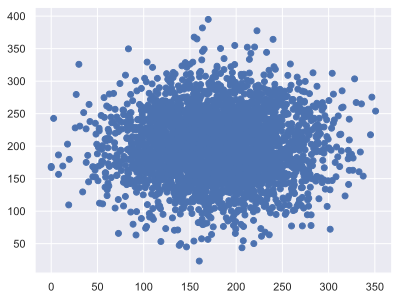

In [27]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

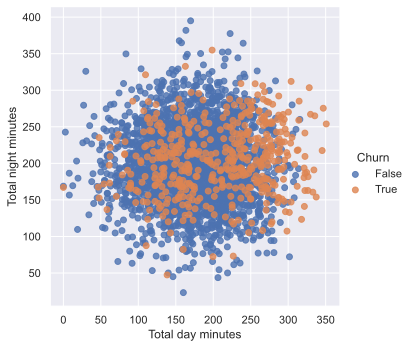

In [29]:
sns.lmplot(
    x='Total day minutes',
    y='Total night minutes',
    data=df,
    hue='Churn',
    fit_reg=False,
)

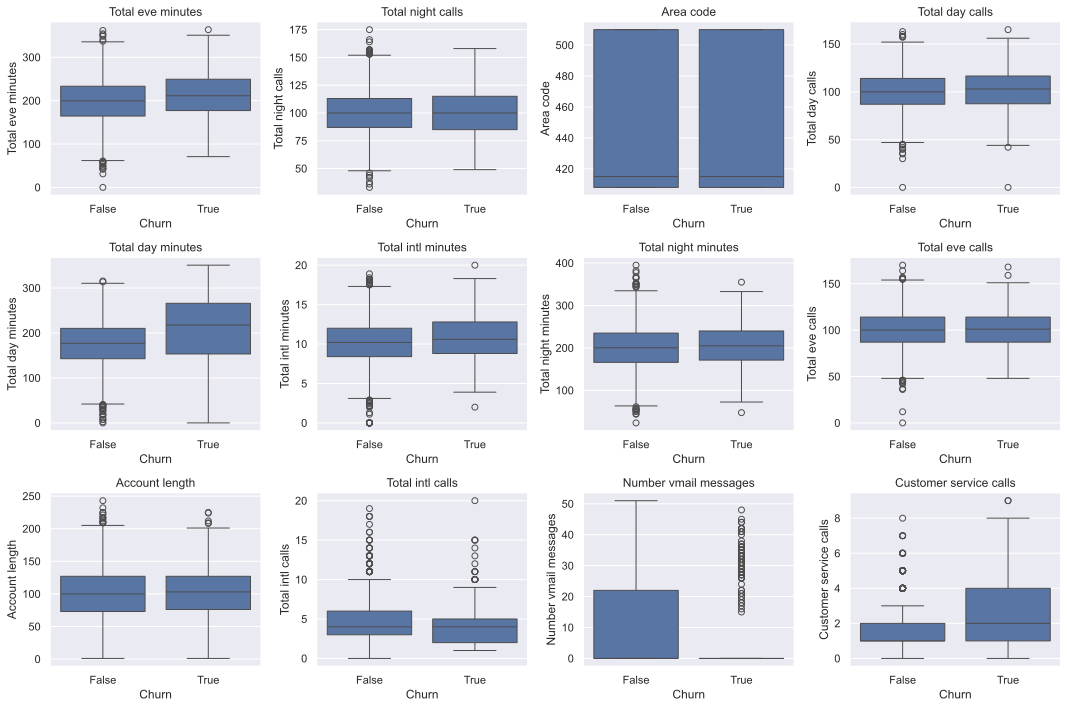

In [35]:
numeric_features.add('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for n, feat in enumerate(numeric_features):
    row = n // 4
    col = n % 4
    sns.boxplot(x=df['Churn'], y=df[feat], ax=axes[row, col])
    axes[row, col].set_title(feat)
plt.tight_layout()